# Imports

In [1]:


import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
import keras.utils as np_utils
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image

Using TensorFlow backend.


# Data load

## Train data

In [65]:
# Load training data frame
train_data_path = '../../dat/train.csv'
all_train_df = pd.read_csv(train_data_path)
print('Training DataFrame loaded')
all_train_df.head(3)

Training DataFrame loaded


,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284


In [60]:
y = all_train_df.loc[all_train_df.id =='cacf8152e2d2ae60']['landmark_id']
#all_train_df.loc[all_train_df.id =='cacf8152e2d2ae60', ['landmark_id']]

In [64]:
int(y)

4676

In [36]:
W = 400
L = 400

In [66]:
def load_data(directory, df):

    
    x = []
    y = []
    # Loop on all jpg files
    for img_file in os.listdir(directory):

        try:
            img = Image.open(os.path.join(directory, img_file))
            img = np.array(img.resize((L,W)))
            x.append(img)
            id_str = os.path.splitext(img_file)[0]
            y.append(int(df.loc[df.id ==id_str]['landmark_id']))
        except:
            print 'Cannot load img file'
    x = np.array(x)
    y = np.array(y)
    return x, y

(400, 300, 3)

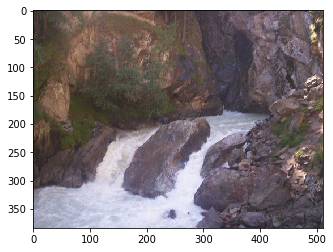

In [27]:
#jpgfile = Image.open(all_train_df.iloc[0]['id']+'.jpg')
#jpgfile = Image.open(open("../../dat/all_train_raw/0a58358a2afd3e4e.jpg", 'rb'))

img = Image.open(os.path.abspath("../../dat/all_train_raw/fb3bd13be65b86b0.jpg"))
#jpgfile.show()
plt.imshow(img)

#img


w = 300
h = 400
#img = img.resize((w,h), Image.ANTIALIAS)
img = img.resize((w,h))

img = np.array(img)
img.shape

(375, 500, 3)

In [68]:
# Train



directory = '../../dat/all_train_raw'
x, y = load_data(directory, all_train_df)
print x.shape
print y.shape

Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load img file
Cannot load i

## Test data

In [70]:
test_data_path = '../../dat/test.csv'
test_df = pd.read_csv(test_data_path)
print('Test DataFrame loaded')
test_df.head(3)

Test DataFrame loaded


,id,url
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...


In [71]:
directory = '../../dat/test_raw'
x_test, y_test = load_data(directory, test_df)
print x_test.shape
print y_test.shape

(0,)
(0,)


## Random split train into train/val

In [72]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
x_train.shape

(6, 400, 400, 3)

In [73]:
x_val.shape

(2, 400, 400, 3)

In [ ]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_test /= 255
x_val /= 255

## Histo of classes in train/va/test

# Model

In [ ]:
## Top model pre-train

In [ ]:
## Top model + top base layers fine tune

In [ ]:
img_width = W
img_height = L

nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# build the VGG16 network

input_shape = (3,img_width,img_height)
VGG_model = applications.VGG16(weights='imagenet', include_top=False, input_shape = (img_width,img_height,3))
print('Model loaded.')
print(VGG_model.summary())
'''
model = Sequential()
for layer in VGG_model.layers:
    model.add(layer)
'''
# build a classifier model to put on top of the convolutional model
top_model = Sequential()
#top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Flatten(input_shape=VGG_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
#model.add(top_model)
model = Model(inputs= VGG_model.input, outputs= top_model(VGG_model.output))

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
print model.summary()

In [ ]:
data_augmentation = True

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_val, y_val),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_val, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
# Predict on test

# Prepare submission